Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187 entries, 0 to 186
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Country/Region          187 non-null    object 
 1   Confirmed               187 non-null    int64  
 2   Deaths                  187 non-null    int64  
 3   Recovered               187 non-null    int64  
 4   Active                  187 non-null    int64  
 5   New cases               187 non-null    int64  
 6   New deaths              187 non-null    int64  
 7   New recovered           187 non-null    int64  
 8   Deaths / 100 Cases      187 non-null    float64
 9   Recovered / 100 Cases   187 non-null    float64
 10  Deaths / 100 Recovered  187 non-null    float64
 11  Confirmed last week     187 non-null    int64  
 12  1 week change           187 non-null    int64  
 13  1 week % increase       187 non-null    float64
 14  WHO Region              187 

c:\Users\Gayathri B\OneDrive\Desktop\EDA\env\Lib\site-packages\pandas\core\nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)


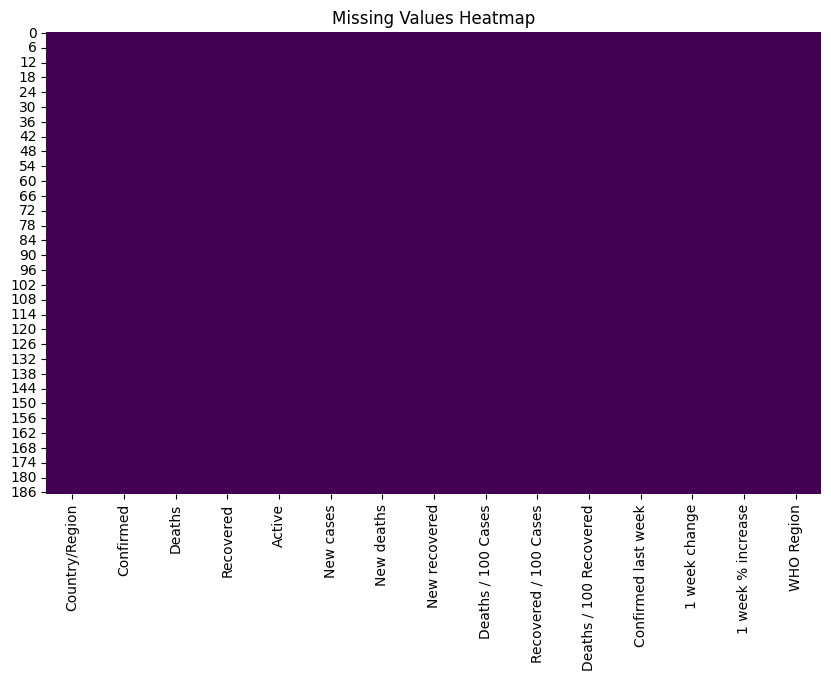

ValueError: could not convert string to float: 'Afghanistan'

<Figure size 1200x800 with 0 Axes>

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data_path = r"C:\Users\Gayathri B\OneDrive\Desktop\EDA\country_wise_latest.csv"  # Update the path if required
data = pd.read_csv(data_path)

# Display basic information about the dataset
print("Dataset Info:")
data.info()
print("\nBasic Statistics:")
print(data.describe())
print("\nFirst 5 rows of the dataset:")
print(data.head())

# Check for missing values
print("\nMissing Values:")
print(data.isnull().sum())

# Handle missing values (if any)
# Example: Fill missing values with the mean of the column
data.fillna(data.mean(numeric_only=True), inplace=True)

# Check the data types
print("\nData Types:")
print(data.dtypes)

# Visualizing missing values (if any)
plt.figure(figsize=(10, 6))
sns.heatmap(data.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Values Heatmap")
plt.show()

# Plotting the correlation heatmap
plt.figure(figsize=(12, 8))
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Heatmap")
plt.show()

# Distribution of numerical features
numerical_columns = data.select_dtypes(include=[np.number]).columns
for col in numerical_columns:
    plt.figure(figsize=(8, 5))
    sns.histplot(data[col], kde=True, bins=30)
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.show()

# Pair plot to explore relationships
sns.pairplot(data)
plt.show()

# Categorical analysis (if any categorical columns exist)
categorical_columns = data.select_dtypes(include=['object']).columns
for col in categorical_columns:
    plt.figure(figsize=(8, 5))
    sns.countplot(x=data[col], order=data[col].value_counts().index)
    plt.title(f"Count of {col}")
    plt.xticks(rotation=90)
    plt.show()

# Boxplots to analyze outliers in numerical data
for col in numerical_columns:
    plt.figure(figsize=(8, 5))
    sns.boxplot(x=data[col])
    plt.title(f"Boxplot of {col}")
    plt.xlabel(col)
    plt.show()

# Grouping and aggregating data (example)
if 'Country' in data.columns:
    country_stats = data.groupby('Country').mean(numeric_only=True)
    print("\nCountry-wise Mean Statistics:")
    print(country_stats)

# Saving cleaned data (optional)
cleaned_data_path = "cleaned_country_data.csv"
data.to_csv(cleaned_data_path, index=False)
print(f"Cleaned dataset saved to {cleaned_data_path}")


